## Desafío 1: Genere una submuestra de casos

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(3402) # Semilla aleatoria digitos del RUT
df= pd.read_csv('qog_std_cs_jan18.csv')
mediandf=int(df.shape[0]/2)  # 50 % de la muestra, es decir 50 % de los registros
subdf=df[['undp_hdi','ccodealp','ht_region','gle_cgdpc','imf_pop','cname','wef_imort', 
          'who_alc2000', 'who_tobt','wdi_exph']].sample( mediandf ) # submuestra con las variables solicitadas

subdf['region_recod']= df['ht_region'].replace([1,2,3,4,5,6,7,8,9,10],  # recodificación de las regiones
 ['EastEurope','Latam','NorthAfrica','SubSaharian','WesternDem',
 'EastAsia','SouthEastAsia','SouthAsia','Pacific','Caribbean'])
subdf.head()


,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,cname,wef_imort,who_alc2000,who_tobt,wdi_exph,region_recod
153,0.781,SYC,4,9583.32030,0.090,Seychelles,11.200000,9.72,26.700001,3.369817,SubSaharian
178,0.688,TKM,1,13217.39000,NaN,Turkmenistan,NaN,2.90,NaN,2.067386,EastEurope
89,NaN,PRK,6,1727.81990,NaN,"Korea, North",NaN,3.35,NaN,NaN,EastAsia
189,0.697,UZB,1,7370.72020,29.746,Uzbekistan,NaN,2.83,13.300000,5.838522,EastEurope
154,0.431,SLE,4,979.95001,6.232,Sierra Leone,117.400002,3.78,34.400002,11.089902,SubSaharian


## Desafío 2

In [228]:
def descriptives_analisis (dataframe, var):
    """
    Definicion: Esta función entrega las estadísticas descriptivas o frecuencias de una variable de un dataframe, dependiendo
    de si ésta es numérica o no numérica
    
    Parametros: dataframe corresponde al dataframe a analizar, var corresponde a la columna del dataframe que se desea analizar
    
    Salida: Retorna una serie con las estadísticas descriptivas o frecuencia dependiendo del tipo de variable analizada
    """
    if dataframe[var].dtypes != 'object' :    # object debe ser string, es decir ''
        descriptives = dataframe[var].describe()  #dataframe [] esto retorna una serie, si lo hacemos [[]] retorna una dataframe
    else:
        descriptives=dataframe[var].value_counts()
    return descriptives



In [234]:
descriptives_analisis(subdf,'region_recod') 

SubSaharian      29
EastEurope       15
Latam            11
WesternDem       11
NorthAfrica       8
Caribbean         6
SouthEastAsia     5
Pacific           5
EastAsia          4
SouthAsia         3
Name: region_recod, dtype: int64

In [231]:
descriptives_analisis(subdf,'gle_cgdpc')

count        96.000000
mean      13531.255502
std       16056.052174
min         324.160000
25%        2670.137500
50%        9057.814950
75%       17065.470750
max      104049.440000
Name: gle_cgdpc, dtype: float64

In [232]:
descriptives_analisis(subdf,'undp_hdi')

count    92.000000
mean      0.687750
std       0.160097
min       0.351000
25%       0.569250
50%       0.728500
75%       0.795000
max       0.938000
Name: undp_hdi, dtype: float64

In [233]:
descriptives_analisis(subdf,'imf_pop')

count     72.000000
mean      25.709597
std       41.631693
min        0.012000
25%        2.034000
50%        7.667000
75%       33.833499
max      202.768997
Name: imf_pop, dtype: float64

* Comparé con dos compañeros ylos valores son similares, varían ligeramente dependiendo del número de recuentos, pero en general tienen bastante coincidencia

## Desafío 3

In [251]:
def samples_lost(dfm, var, print_list= False, pais=False):
    '''
    Definicion: Esta función entrega los valores perdidos en cantidad y porcentaje, además de una lista y los países respectivos
    
    Parametros: dfm, dataframe a analizar, var es la variable a analizar, print_list entrega una lista con los valores perdidos en
    caso de que este True, pais, entregar la lista correspondiente a los paises en caso de que este True
    
    Salida: Retorna impresos la cantidad y porcentaje de valores perdidos, también retorna una lista impresa de ellos y la frecuencia
    relativa de los países pertenencientes
    '''
    dan =dfm[var].isna( )
    cantidad= dan.values.ravel().sum() 
    porcentaje=round((dan.values.ravel().sum()/len(dan)*100),3)
    if print_list==True:
        valores_perdidos=[]
        con=0
        missing=list(dan)
        for i in missing:
            if i ==True:
                valores_perdidos.append(i)
        print (valores_perdidos) 
    if pais == True:
        paises =dfm[dfm[var].isna()]['cname']
        print (paises)
         
    print ('La cantidad de valores perdidos es', cantidad,' y el porcentaje es: ', porcentaje, '%')
            
        

In [252]:
samples_lost(subdf,'undp_hdi', True, True)

[True, True, True, True, True]
89         Korea, North
148          San Marino
129    Marshall Islands
119               Nauru
37               Taiwan
Name: cname, dtype: object
La cantidad de valores perdidos es 5  y el porcentaje es:  5.155 %


In [262]:
# con un ciclo se puede acceder a los valores de cada serie en dataframe
var=''
for var in subdf:
    print(var)
    variables= samples_lost(subdf,var, True, True)
    print('\n ')
    print('---------------------------------------------------')
print(variables)
 
    

undp_hdi
[True, True, True, True, True]
89         Korea, North
148          San Marino
129    Marshall Islands
119               Nauru
37               Taiwan
Name: cname, dtype: object
La cantidad de valores perdidos es 5  y el porcentaje es:  5.155 %

 
---------------------------------------------------
ccodealp
[]
Series([], Name: cname, dtype: object)
La cantidad de valores perdidos es 0  y el porcentaje es:  0.0 %

 
---------------------------------------------------
ht_region
[]
Series([], Name: cname, dtype: object)
La cantidad de valores perdidos es 0  y el porcentaje es:  0.0 %

 
---------------------------------------------------
gle_cgdpc
[True]
163    South Sudan
Name: cname, dtype: object
La cantidad de valores perdidos es 1  y el porcentaje es:  1.031 %

 
---------------------------------------------------
imf_pop
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
178 

* Según los valores anteriores las variables who_tobt(34.021 %), imf_pop (25.773 %) y wef_imort(24.742 %) son las que presentan mayores porcentajes de valores perdidos

## Desafío 4 

In [290]:
def histograma(dataframe, var, sample_mean=False, true_mean=False):
    '''
    Definicion: Esta función gráfica un histograma y entrega las medias de la muestra y del dataframe completo
    
    Parametros: dataframe: recibe el dataframe a analizar, var corresponde a la variable del dataframe, sample_mean: booleano que  
    corresponde al gráfico de la media muestral en la variable a analizar; true_mean devuelve la media del dataframe original, sin
    selección de muestras
    
    Salida: Retorna impresos la cantidad y porcentaje de valores perdidos, también retorna una lista impresa de ellos y la frecuencia
    relativa de los países pertenencientes
    '''
    clean= dataframe[var].dropna() #limpiezadedatos
    plt.hist(clean, color='grey', alpha=.9)
    plt.title(var)

    if sample_mean is True:
        plt.axvline(np.mean(clean), color='black',alpha=.9,linestyle='--')
    if true_mean is True:
        plt.axvline(np.mean(df[var]), color='tomato')

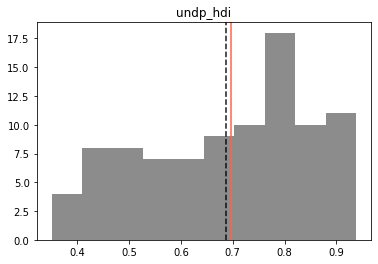

In [291]:
histograma(subdf,'undp_hdi', True, True)

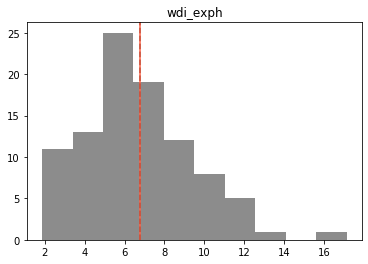

In [292]:
histograma(subdf,'wdi_exph', True, True)

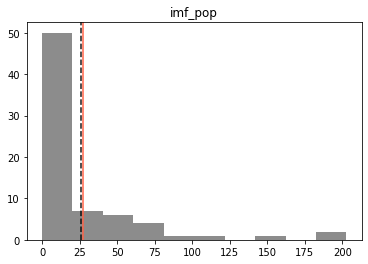

In [293]:
histograma(subdf,'imf_pop', True, True)

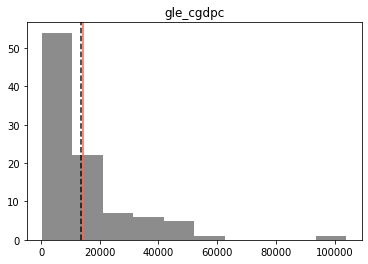

In [294]:
histograma(subdf,'gle_cgdpc', True, True)

* Para las variables analizadas ninguna media de la submuestra es mayor a la media del dataframe, o son ligeramente menores 
  o iguales como en el caso de la variable imf_pop.

## Desafío 5

In [355]:
def dotplot(df, plot_var, plot_by, global_stat = False, statistic = 'mean'):
    '''
    Definicion: Esta función gráfica un dotplot(gráfico de puntos) de una variable numérica ordenada por otra variable, de un data
    set definido, también tiene la opción de graficar la mediana o la media global de la variable 
    
    Parametros: dataframe: recibe el dataframe a analizar, plot_var corresponde a la variable que se graficará, plot_by corresponde
    a la variable que se usará para ordenar y agrupar plot_var, global_stat es un booleano que genera una estadística de la variable
    global, statistic es un parametro para definir si se calculará la mediana o la media global
    
    Salida: arroja un dotplot, con el calculo de las media o medianas de la variable del dataset, con la opción de agregar una línea
    de tendencia de la media o de la mediana global
    '''
    df_temp = df.loc[:, [plot_by, plot_var]]   #1. selección de las series del DF
    
    if statistic is 'median':                       # 2. Condicional del calculo de la media o mediana
        df_temp_descriptive = df_temp.groupby(plot_by)[plot_var].median()
    if statistic is 'mean':
        df_temp_descriptive  = df_temp.groupby(plot_by)[plot_var].mean()
   
    por=' ordenado por '                        #3. Nombre de los ejees
    plt.title(plot_var + por + plot_by)
    plt.xlabel(plot_var)
    plt.ylabel(plot_by)
    
    plt.plot(df_temp_descriptive.values, df_temp_descriptive.index, 'o', color='black') #4. Gráfica principal
    plt.grid(True, linestyle='-.') # 5. datos de la grilla agregar la grilla
    plt.tick_params(labelcolor='b', labelsize='medium', width=3) # 6. parametros de los ejes

    if global_stat is True and  statistic is 'mean':          #7. Gráfica de la media o mediana global
        plt.axvline(df[plot_var].mean(), color='tomato',lw=2, linestyle='--')
    if global_stat is True and statistic is 'median':
        plt.axvline(df[plot_var].median(), color='blue', lw=2, linestyle='--')


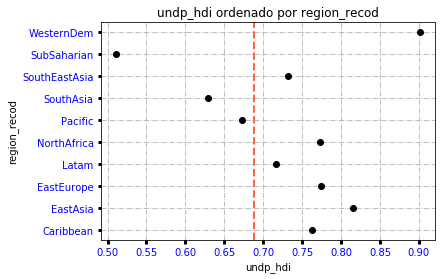

In [356]:
dotplot(subdf,'undp_hdi','region_recod',True,'mean')


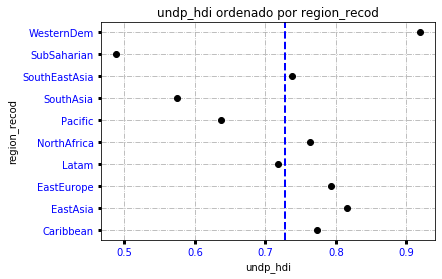

In [357]:
dotplot(subdf,'undp_hdi','region_recod',True,'median')

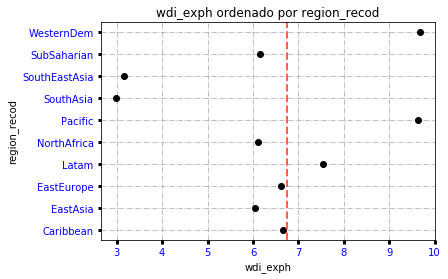

In [358]:
dotplot(subdf,'wdi_exph','region_recod',True,'mean')

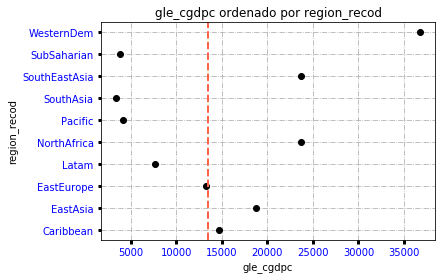

In [359]:
dotplot(subdf,'gle_cgdpc','region_recod',True,'mean')

## Desafío 6

In [ ]:
subdf.to_csv('subsample_JO_demo.csv') 